### Tüm dosyaları listelemek
---

#### image_shape= (128,128,3)

In [ ]:
import os
import random
import pandas as pd
import numpy as np
from glob import glob
import tensorflow_io as tfio
import matplotlib.pyplot as plt
plt.style.use("ggplot")
import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array , array_to_img

In [ ]:
# Görüntü yolu
image_paths = []
# Maske resimlerini almak
mask_paths = glob('../input/lgg-mri-segmentation/kaggle_3m/*/*_mask*')
print(mask_paths[0:5])

['../input/lgg-mri-segmentation/kaggle_3m/TCGA_DU_7010_19860307/TCGA_DU_7010_19860307_56_mask.tif', '../input/lgg-mri-segmentation/kaggle_3m/TCGA_DU_7010_19860307/TCGA_DU_7010_19860307_8_mask.tif', '../input/lgg-mri-segmentation/kaggle_3m/TCGA_DU_7010_19860307/TCGA_DU_7010_19860307_34_mask.tif', '../input/lgg-mri-segmentation/kaggle_3m/TCGA_DU_7010_19860307/TCGA_DU_7010_19860307_33_mask.tif', '../input/lgg-mri-segmentation/kaggle_3m/TCGA_DU_7010_19860307/TCGA_DU_7010_19860307_43_mask.tif']


In [ ]:
# orjinal görüntüler
for img_path in mask_paths:
    image_paths.append(img_path.replace('_mask',''))
# ilk 5 resim
print(image_paths[0:5])

['../input/lgg-mri-segmentation/kaggle_3m/TCGA_DU_7010_19860307/TCGA_DU_7010_19860307_56.tif', '../input/lgg-mri-segmentation/kaggle_3m/TCGA_DU_7010_19860307/TCGA_DU_7010_19860307_8.tif', '../input/lgg-mri-segmentation/kaggle_3m/TCGA_DU_7010_19860307/TCGA_DU_7010_19860307_34.tif', '../input/lgg-mri-segmentation/kaggle_3m/TCGA_DU_7010_19860307/TCGA_DU_7010_19860307_33.tif', '../input/lgg-mri-segmentation/kaggle_3m/TCGA_DU_7010_19860307/TCGA_DU_7010_19860307_43.tif']


In [ ]:
image_list_ds = tf.data.Dataset.list_files(image_paths, shuffle=False)
mask_list_ds = tf.data.Dataset.list_files(mask_paths, shuffle=False)

for path in zip(image_list_ds.take(3), mask_list_ds.take(3)):
    print(path)

2022-06-16 21:29:49.337074: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-16 21:29:49.453211: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-16 21:29:49.453987: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-16 21:29:49.457564: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

(<tf.Tensor: shape=(), dtype=string, numpy=b'../input/lgg-mri-segmentation/kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_1.tif'>, <tf.Tensor: shape=(), dtype=string, numpy=b'../input/lgg-mri-segmentation/kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_10_mask.tif'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'../input/lgg-mri-segmentation/kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_10.tif'>, <tf.Tensor: shape=(), dtype=string, numpy=b'../input/lgg-mri-segmentation/kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_11_mask.tif'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'../input/lgg-mri-segmentation/kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_11.tif'>, <tf.Tensor: shape=(), dtype=string, numpy=b'../input/lgg-mri-segmentation/kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_12_mask.tif'>)


2022-06-16 21:29:49.459113: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-16 21:29:49.459970: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-16 21:29:51.355792: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-16 21:29:51.356676: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-16 21:29:51.357355: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

In [ ]:
# tüm veri kümesi için görüntü yolları
image_files = tf.constant(image_paths)
masks_files = tf.constant(mask_paths)


In [ ]:

dataset = tf.data.Dataset.from_tensor_slices((image_files, masks_files))
# verilerin ilk üç yolunu yazdırmak
for image, mask in dataset.take(1):
    print(image)
    print(mask)

tf.Tensor(b'../input/lgg-mri-segmentation/kaggle_3m/TCGA_DU_7010_19860307/TCGA_DU_7010_19860307_56.tif', shape=(), dtype=string)
tf.Tensor(b'../input/lgg-mri-segmentation/kaggle_3m/TCGA_DU_7010_19860307/TCGA_DU_7010_19860307_56_mask.tif', shape=(), dtype=string)


In [ ]:
#ön işleme
#hem görüntü hem de maske yolunu alan ve görüntüyü döndüren işlev
def process_path(image_path, mask_path):
    img = tf.io.read_file(image_path)
    img = tfio.experimental.image.decode_tiff(img)
    img = img[:,:,0:3]
    img = tf.image.convert_image_dtype(img, tf.float32)

    mask = tf.io.read_file(mask_path)
    mask = tfio.experimental.image.decode_tiff(mask)

    mask = mask[:,:,0:3]
    mask = tf.image.convert_image_dtype(mask, tf.float32)
    mask = tf.math.reduce_max(mask, axis=-1, keepdims=True)
    return img, mask


def preprocess(image, mask):
    input_image = tf.image.resize(image, (128, 128), method='nearest')
    input_mask = tf.image.resize(mask, (128, 128), method='nearest')

    return input_image, input_mask


In [ ]:
# tüm veriler için ön işleme
image_ds = dataset.map(process_path)
processed_image_ds = image_ds.map(preprocess)

2022-06-16 21:29:52.186351: I tensorflow_io/core/kernels/cpu_check.cc:128] Your CPU supports instructions that this TensorFlow IO binary was not compiled to use: AVX2 AVX512F FMA


In [ ]:
processed_image_ds.element_spec

(TensorSpec(shape=(128, 128, None), dtype=tf.float32, name=None),
 TensorSpec(shape=(128, 128, 1), dtype=tf.float32, name=None))

In [ ]:
# bazı resimleri çektik
images = [image[0]  for image in list(processed_image_ds.take(5))]
masks = [mask[1] for mask in list(processed_image_ds.take(5))]

2022-06-16 21:29:52.515297: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


<Figure size 1080x1080 with 0 Axes>

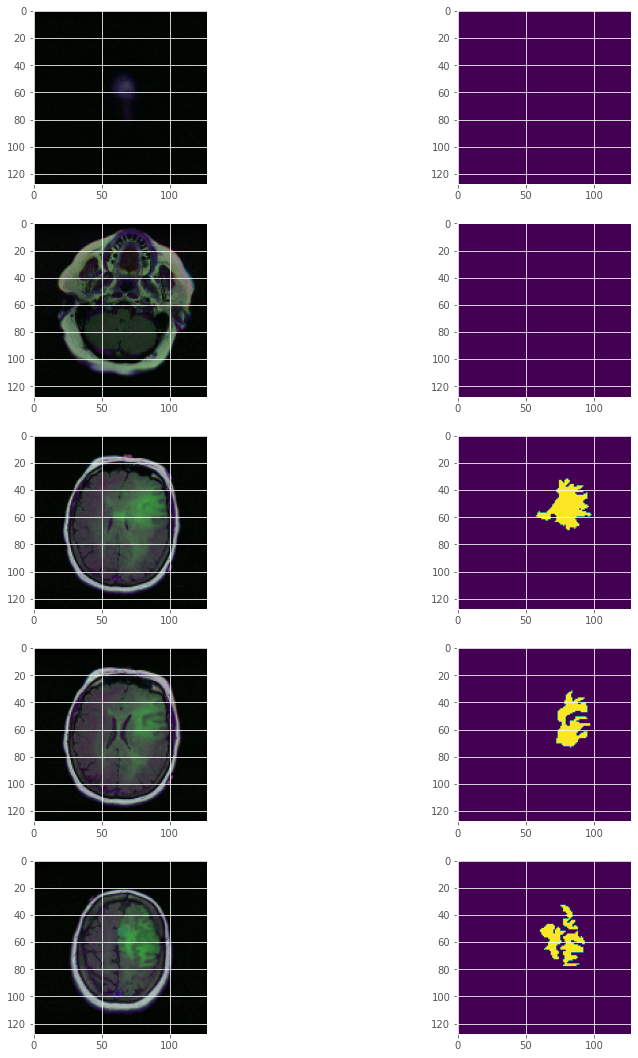

In [ ]:
#bazı resimleri ve maskeleri gösterme
plt.figure(figsize=(15,15))
fig, axarr = plt.subplots(5,2,figsize=(15, 15))
axarr[0,0].imshow(images[0])
axarr[0,1].imshow(masks[0])
axarr[1,0].imshow(images[1])
axarr[1,1].imshow(masks[1])
axarr[2,0].imshow(images[2])
axarr[2,1].imshow(masks[2])
axarr[3,0].imshow(images[3])
axarr[3,1].imshow(masks[3])
axarr[4,0].imshow(images[4])
axarr[4,1].imshow(masks[4])
fig.tight_layout(pad=1.8)

In [ ]:
# verideki görüntü sayısı
len(processed_image_ds)

3929

In [ ]:
# verileri train/val/test olarak ayırmak için
BUFFER_SIZE = 1000
BATCH_SIZE = 32
processed_image_ds.batch(BATCH_SIZE)
Full_dataset = processed_image_ds.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

In [ ]:
Full_dataset.element_spec

(TensorSpec(shape=(None, 128, 128, None), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 128, 128, 1), dtype=tf.float32, name=None))

In [ ]:
# veri sayısı
len_data = len(Full_dataset)
len_data

123

In [ ]:
# verileri ayırma
train_size = int(len_data *.9 )
val_size = int(len_data *.05)
test_size = len_data - train_size - val_size
train_size , test_size ,val_size

(110, 7, 6)

In [ ]:
train_ds = Full_dataset.take(train_size)
test_ds = Full_dataset.skip(train_size).take(test_size)
val_ds = Full_dataset.skip(train_size + test_size)

In [ ]:
len(train_ds),len(test_ds),len(val_ds)

(110, 7, 6)

In [ ]:
print(train_ds.element_spec)

(TensorSpec(shape=(None, 128, 128, None), dtype=tf.float32, name=None), TensorSpec(shape=(None, 128, 128, 1), dtype=tf.float32, name=None))


In [ ]:
# Model üç bölümden oluşur:
#Altörnekleme evrişimli "Normal Evrişim"
#Evrişimsel "Transpoze Evrişim"i örnekleme
#Residual Connection`f bağlantısını atla

from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Conv2DTranspose
from tensorflow.keras.layers import concatenate

In [ ]:
#Aşağı iniş Bloğu
#Her konv bloğu iki evrişim katmanından oluşacaktır
#dönüş bloğunu yapıştırmak için
def conv_block(inputs=None,n_filters=32 ,dropout=0,max_pooling=True):
    """
    inputs : input from the previos block
    n_filters : number of filters
    dropout : the probalility to use dropout
    max_pooling : to use max_pooling or not
    Return : the volume for the nex block
    """

    conv = Conv2D(
                  n_filters,
                  3,# kernel_size
                  activation="relu",
                  padding="same",
                  kernel_initializer="he_normal"
                 )(inputs)

    conv = Conv2D(
                  n_filters,
                  3,
                  activation="relu",
                  padding="same",
                  kernel_initializer="he_normal"
                 )(conv)

    if dropout >0:

        conv = Dropout(dropout)(conv)

    if max_pooling:

        out_to_next = MaxPooling2D(2)(conv)
    else:
        out_to_next = conv

    out_to_skip = conv
    return out_to_next , out_to_skip

In [ ]:
#Örnekleme bloğu
#örnekleme için Transpose katmanından oluşacaktır
#ardından iki normal evrişim
#örnekleme bloğunu oluşturma

def upsampling_block(previos_output, skip_output, n_filters=32):

    up_sample = Conv2DTranspose(
                         n_filters,
                         3,
                         strides=(2,2),
                         padding="same"
                        )(previos_output)

    concate = concatenate([up_sample,skip_output],axis=3)
    conv = Conv2D(n_filters,
                 3,
                 activation="relu",
                 padding="same",
                 kernel_initializer="he_normal")(concate)
    conv = Conv2D(n_filters,
                 3,
                 activation="relu",
                 padding="same",
                 kernel_initializer="he_normal")(conv)
    return conv

In [ ]:
#model oluşturma
def unet_model(input_size=(256, 256, 3), n_filters=32):
    # altörnekleme kısmıyla başla
    inputs = Input(input_size)
    conv_block1 = conv_block(inputs, n_filters)
    conv_block2 = conv_block(conv_block1[0], n_filters *2)
    conv_block3 = conv_block(conv_block2[0], n_filters * 4)
    conv_block4 = conv_block(conv_block3[0], n_filters *8, dropout=.3)
    conv_block5 = conv_block(conv_block4[0], n_filters *16, dropout=.3, max_pooling=False)
    # Örnekleme kısmı
    up_block1 = upsampling_block(conv_block5[0], conv_block4[1],  n_filters * 8)
    up_block2 = upsampling_block(up_block1, conv_block3[1],  n_filters * 4)
    up_block3 = upsampling_block(up_block2, conv_block2[1],  n_filters * 2)
    up_block4 = upsampling_block(up_block3, conv_block1[1],  n_filters )

    conv9 = Conv2D(n_filters,
                 3,
                 activation='relu',
                 padding='same',
                 kernel_initializer='he_normal')(up_block4)

    # çıkış parçası
    conv10 = Conv2D(2, 1, padding="same")(conv9)

    model = tf.keras.Model(inputs=inputs, outputs=conv10)

    return model

In [ ]:
img_height = 128
img_width = 128
num_channels = 3
unet = unet_model((img_height, img_width, num_channels))

In [ ]:
unet.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 128, 128, 32) 896         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 128, 128, 32) 9248        conv2d[0][0]                     
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 64, 64, 32)   0           conv2d_1[0][0]                   
______________________________________________________________________________________________

In [ ]:
from tensorflow.keras import backend as K

In [ ]:
# modeli derlemek
unet.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
def display(display_list):
    plt.figure(figsize=(15, 15))

    title = ['Input Image', 'True Mask', 'Predicted Mask']

    for i in range(len(display_list)):
        plt.subplot(1, len(display_list), i+1)
        plt.title(title[i])
        plt.imshow(tf.keras.preprocessing.image.array_to_img(display_list[i]))
#         plt.axis('off')
    plt.show()

(32, 128, 128, 1)
(32, 128, 128, 3)


2022-06-16 21:30:04.518462: W tensorflow/core/kernels/data/cache_dataset_ops.cc:768] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


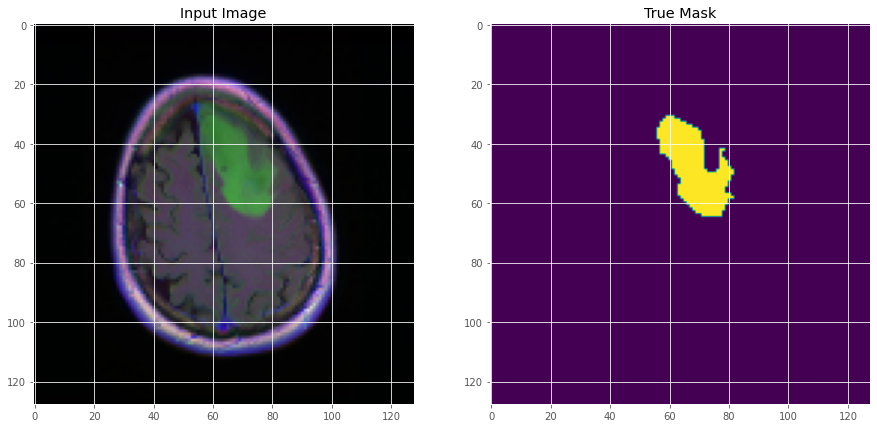

In [ ]:
for image, mask in train_ds.take(1):
    sample_image, sample_mask = image[20], mask[20]
    print(mask.shape)
    print(image.shape)
display([sample_image, sample_mask])

In [ ]:
# modeli eğitimi
history = unet.fit(train_ds,
                   validation_data=val_ds,
                   callbacks = [tf.keras.callbacks.ModelCheckpoint('unet_brain_mri_seg.hdf5', verbose=1, save_best_only=True)],
                   epochs=2,
                  )

Epoch 1/2


2022-06-16 21:30:11.119548: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


110/110 [==============================] - 49s 324ms/step - loss: 0.0761 - accuracy: 0.9900 - val_loss: 0.0254 - val_accuracy: 0.9923

Epoch 00001: val_loss improved from inf to 0.02537, saving model to unet_brain_mri_seg.hdf5
Epoch 2/2
110/110 [==============================] - 10s 91ms/step - loss: 0.0251 - accuracy: 0.9924 - val_loss: 0.0266 - val_accuracy: 0.9913

Epoch 00002: val_loss did not improve from 0.02537


Text(0.5, 1.0, 'Accuraccy Curve')

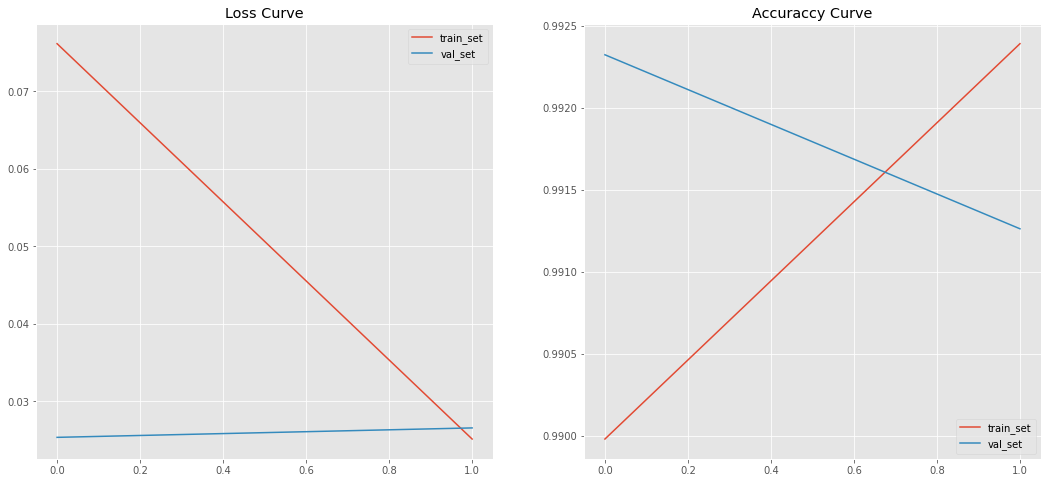

In [ ]:
plt.style.use("ggplot")
plt.figure(figsize=(18, 8))
# kayıp eğrisi
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='train_set')
plt.plot(history.history['val_loss'], label='val_set')
plt.legend()
plt.title('Loss Curve')
# doğruluk eğrisi
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='train_set')
plt.plot(history.history['val_accuracy'], label='val_set')
plt.legend()
plt.title('Accuraccy Curve')

In [ ]:
#Model performansını görüntü üzerinde görselleştirin
def create_mask(pred_mask):
    pred_mask = tf.math.argmax(pred_mask, axis=-1)
    pred_mask = pred_mask[..., tf.newaxis]
    return pred_mask[0]

In [ ]:
def display(display_list):
    plt.figure(figsize=(15, 50))

    title = ['Input Image', 'True Mask', 'Predicted Mask']

    for i in range(len(display_list)):
        plt.subplot(1, len(display_list), i+1)
        plt.title(title[i])
        plt.imshow(tf.keras.utils.array_to_img(display_list[i]))
        plt.axis('off')
    plt.show()

In [ ]:
def show_predictions(dataset=None, num=1):
    if dataset:
        for image, mask in dataset.take(num):
            pred_mask = unet.predict(image)
            display([image[0], mask[0], create_mask(pred_mask)])

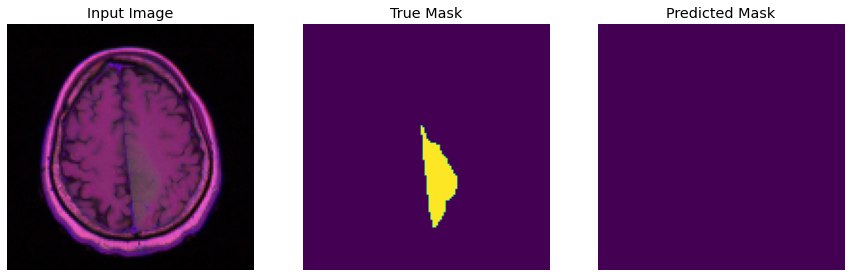

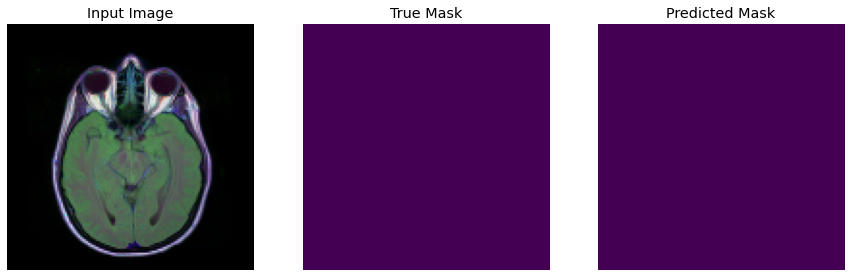

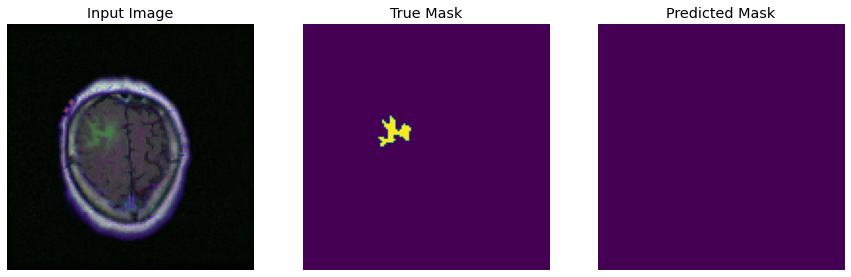

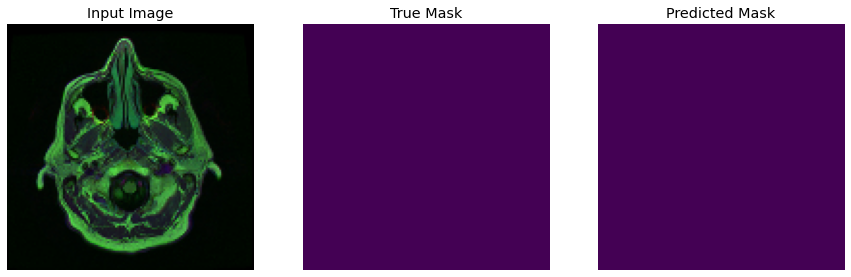

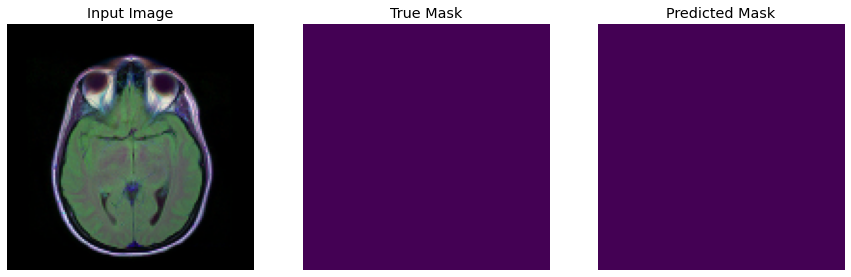

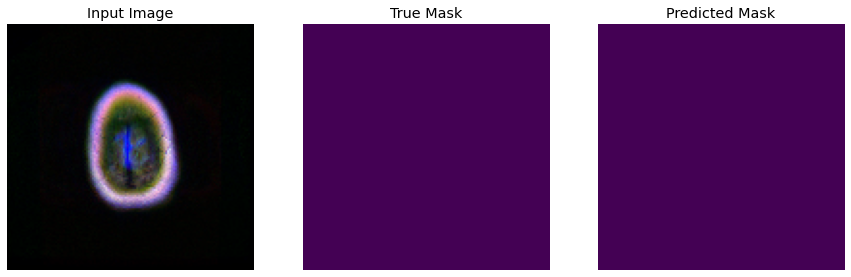

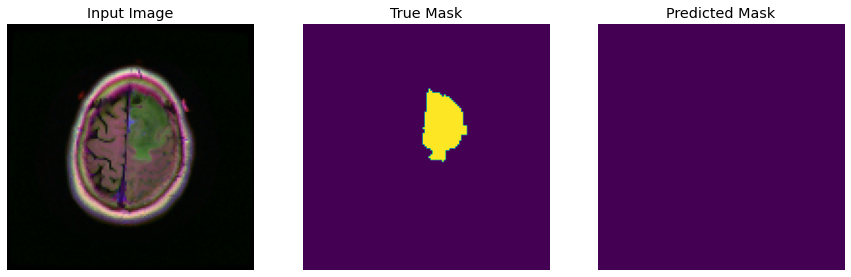

In [ ]:
show_predictions(test_ds,20)